1\. **Spotting correlations**

Load the remote file:

```bash
https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv
```

with Pandas and create scatter plots with all possible combinations of the following features:
    
  + features_1
  + features_2
  + features_3
  
Are these features correlated?

In [1]:
#!wget https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv

--2022-11-25 11:15:55--  https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.18, 2620:100:6025:18::a27d:4512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/aamg1apjhclecka/regression_generated.csv [following]
--2022-11-25 11:15:56--  https://www.dropbox.com/s/raw/aamg1apjhclecka/regression_generated.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc1d65ed3e9e875742208cf56660.dl.dropboxusercontent.com/cd/0/inline/BxYGkC-iV524P4mp4XxnDvmtDhXQuIHkhmFweMQNU5LayI1KzXBHan1K5dU39a2HKFX7MPvE6prgZCdW0yjuF-dNcoK33lZ_P6Z4WYCPtNis8IJ__CXmlwJzthTbxBPaWi22q5gw6p32MFTazhMj1QFVf7nw8PCILlMTQ47vCjXVLA/file# [following]
--2022-11-25 11:15:57--  https://uc1d65ed3e9e875742208cf56660.dl.dropboxusercontent.com/cd/0/inline/BxYGkC-iV524P4mp4XxnDvmtDhXQuIHkhmFweMQNU

<AxesSubplot:>

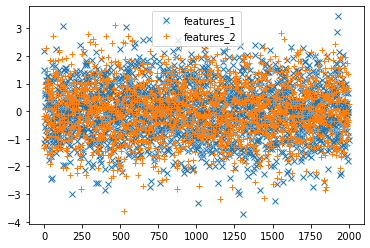

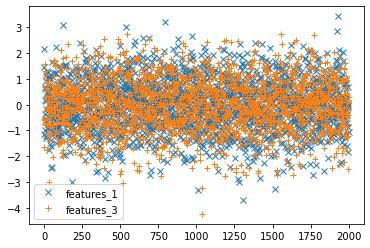

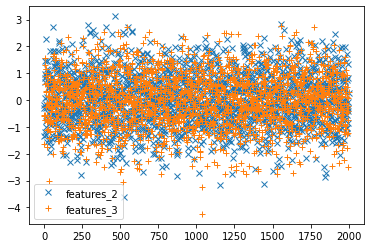

In [73]:
df=pd.read_csv('regression_generated.csv')
#print(df)
#features_1 and features_2 
feature1_2=df.loc[:,["features_1","features_2"]]
#print(f1_2)
feature1_2.plot(style=['x','+'])
#features_1 and features_3 
feature1_3=df.loc[:,["features_1","features_3"]]
#print(f1_3)
feature1_3.plot(style=['x','+'])
#features_2 and features_3
feature2_3=df.loc[:,["features_2","features_3"]]
#print(f2_3)
feature2_3.plot(style=['x','+']) 


##### The features are correlated

2\. **Color-coded scatter plot**

Produce a scatter plot from a dataset with two categories.

* Write a function that generates a 2D dataset consisting of 2 categories. Each category should distribute as a 2D gaussian with a given mean and standard deviation. Set different values of the mean and standard deviation between the two samples.
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below:

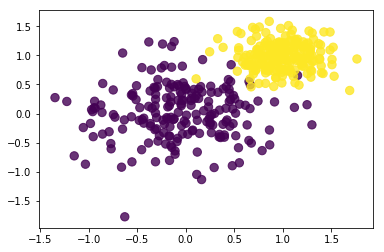

In [3]:
from IPython.display import Image
Image('images/two_categories_scatter_plot.png')

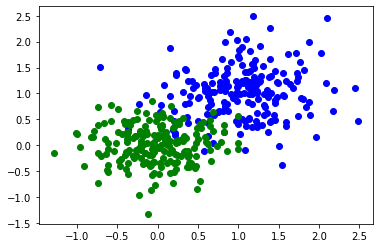

In [24]:
def gaussian(mean,sta_dev) : 
    return np.random.normal(mean, sta_dev, 200)

x_axis1 = gaussian(1, 0.5)
y_axis1 = gaussian(1, 0.5)
plt.scatter(x_axis1, y_axis1, color = 'blue')

x_axis2 = gaussian(0, 0.4)
y_axis2 = gaussian(0, 0.4)

plt.scatter(x_axis2, y_axis2, color = 'green')

plt.show()


3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following pickle file:
```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```
* Inspect the dataset, you'll find two variables (features)
* Convert the content to a Pandas Dataframe
* Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
* Plot a Seaborn `jointplot` of "residuals" versus "distances", and use seaborn to display a linear regression. 

Comment on the correlation between these variables.

* Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
* Obtain 3 numpy arrays:
  * `x`, the array of bin centers of the profile histogram of the "distance" variable
  * `y`, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * `err_y`, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [21]:
#!wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/


--2022-11-25 11:42:22--  https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.18, 2620:100:6025:18::a27d:4512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/3uqleyc3wyz52tr/residuals_261.pkl [following]
--2022-11-25 11:42:22--  https://www.dropbox.com/s/raw/3uqleyc3wyz52tr/residuals_261.pkl
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucfed3432faa954e2324bd7de73c.dl.dropboxusercontent.com/cd/0/inline/Bxa8FDDysyWyNENKTvJA1MSQY_qjntoBZ-0Djx2Sj5Is3eNQHI70fWnFD6HiO6orSRT5NgeAL6AM1iSb2XSeyC2jJxwGV-vHV3TvI0RjQJszFyB16lTfol6v7dPqdBbRQ7u7Lh_2TDcfr66NS7fvVdxEqxhpO_ymhd9JAQSrcXwqHw/file# [following]
--2022-11-25 11:42:23--  https://ucfed3432faa954e2324bd7de73c.dl.dropboxusercontent.com/cd/0/inline/Bxa8FDDysyWyNENKTvJA1MSQY_qjntoBZ-0Djx2Sj5Is3eNQHI70fWnFD6HiO6

In [60]:
data=np.load("data/residuals_261.pkl",allow_pickle=True).item()
data=pd.DataFrame(data)

# Inspection of the dataset
display(data)
print(data.info())

,residuals,distances
0,1.100000,16.0
1,-1.950000,6.3
2,-7.200000,3.4
3,-4.150000,8.4
4,-6.590000,1.7
...,...,...
11126,-0.760000,14.4
11127,0.380000,7.5
11128,0.083333,1.7
11129,0.166667,19.1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11131 entries, 0 to 11130
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   residuals  11131 non-null  float64
 1   distances  11131 non-null  float64
dtypes: float64(2)
memory usage: 174.0 KB
None


       residuals  distances
2          -7.20        3.4
3          -4.15        8.4
4          -6.59        1.7
5         -11.02        4.4
6          -2.27        0.6
...          ...        ...
11088      -3.26        1.4
11120      -3.51       13.9
11121      -4.38        9.6
11123      -2.64        4.6
11125      -2.66        1.9

[641 rows x 2 columns]


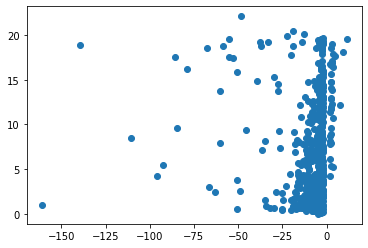

In [25]:
# Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
data.drop( data[abs(data['residuals']) < 2 ].index , inplace=True)
data=data[abs(data['residuals'])>2] 
print(data)

#plot of data
x = data.residuals
y = data.distances
plt.scatter(x,y)
plt.show()



4\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn):

* Fill a numpy array `x` of length N (with $N=\mathcal{O}(100)$) with a variable normally distributed, with a given mean and standard deviation
* Fill an histogram in pyplot taking proper care of the aesthetic:
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* For every element of `x`, create a gaussian with the mean corresponding to the element value and the standard deviation as a parameter that can be tuned. The standard deviation default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with `np.sum()`) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method. Superimpose the normalized sum of all gaussians to the first histogram.


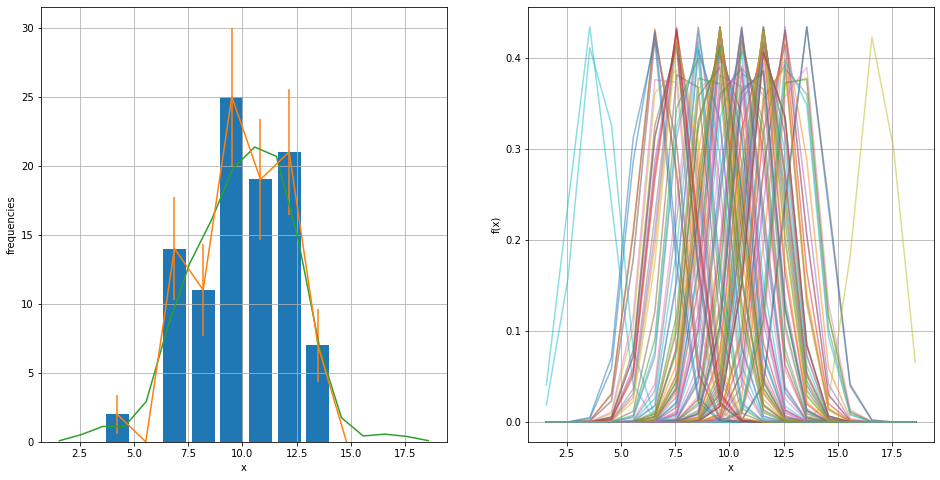

In [72]:
import numpy as np
from scipy import integrate
from scipy.stats import norm
import matplotlib.pyplot as plt

#normally distributed numpy array, x, of len(N) (with N=O(100))
mu, sigma = 10, 2
N = 100
x = np.random.normal(mu, sigma, N)

# generate a histogram
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
Nbins = 10
bins = np.arange(x.min(), x.max(), (x.max()-x.min())/Nbins)
freq, bins, patches = ax1.hist(x = x, bins = bins,alpha=1, histtype='barstacked', rwidth=0.8)
ax1.grid()
ax1.set_xlabel('x')
ax1.set_ylabel('frequencies')

bincenters = (bins[1:] + bins[:-1])/2
ax1.errorbar(x=bincenters, y=freq, yerr=np.sqrt(freq))

# Gaussian with the mean corresponding to the element 
std_def = 1.06 * x.std() * (x.size ** -0.2)
xrange = np.arange(x.min()-sigma, x.max()+sigma)
gaussians = []
for i, dat in enumerate(x):
    gaussians.append( norm(loc=dat, scale=std_def).pdf(xrange) )
    ax2.plot(xrange, gaussians[i], alpha=0.5)
ax2.set_xlabel('x')
ax2.set_ylabel('f(x)')
ax2.grid()

#Sum all the gaussian functions and normalize the result for integral to match with the histogram intergral
#of the original histogram.
area=integrate.trapz(freq, dx=bins[1]-bins[0])
kde=np.array(gaussians).sum(axis=0)
ax1.plot(xrange,kde/sum(kde)*area)
plt.show()
